In [81]:
import numpy as np
from astropy.table import Table, Column, unique
from astropy import units as u
from astropy.coordinates import SkyCoord
from catalog_cross_matcher import catalog_cross_matcher
from astropy.io import fits, ascii
from astropy.wcs import WCS
import matplotlib.pyplot as pl
from astropy.visualization import simple_norm
from astroquery.vizier import Vizier
from regions import PixCoord
from regions import CircleSkyRegion, CirclePixelRegion, PolygonPixelRegion

In [2]:
k = fits.getdata('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_k_mosaic.fits')
j = fits.getdata('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_j_mosaic.fits')
h2 = fits.getdata('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_h2_mosaic.fits')
h = fits.getdata('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_h_mosaic.fits')

k_fh = fits.open('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_k_mosaic.fits')
j_fh = fits.open('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_j_mosaic.fits')
h_fh = fits.open('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_h_mosaic.fits')
h2_fh = fits.open('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_h2_mosaic.fits')

ww_k = WCS(k_fh[0].header)
ww_j = WCS(j_fh[0].header)
ww_h = WCS(h_fh[0].header)
ww_h2 = WCS(h2_fh[0].header)

In [3]:
gtc_cat = Table.read('final_final_gtc_catalog_revised_no_fgs_bsr.dat', format = 'ascii.basic')

# PNICER

In [237]:
c = [SkyCoord(ra = gtc_cat[i]['ra'], dec = gtc_cat[i]['dec'], unit = (u.deg, u.deg)) for i in range(len(gtc_cat))]

In [239]:
gtc_cat.add_columns([np.empty(len(gtc_cat)), np.empty(len(gtc_cat))], names = ['GLON', 'GLAT'])

In [251]:
for i in range(len(gtc_cat)):    
    gtc_cat['GLON'][i], gtc_cat['GLAT'][i] = c[i].galactic.l.value, c[i].galactic.b.value

In [257]:
gtc_cat.write('final_final_gtc_catalog_revised_no_fgs_bsr.fits', format = 'fits', overwrite = True)

In [258]:
import sys

from pnicer import ApparentMagnitudes
from pnicer.utils.auxiliary import get_resource_path

In [259]:
control_path = get_resource_path(package="pnicer.tests_resources", resource="CF_2mass.fits")

In [260]:
science_path = '/orange/adamginsburg/w51/gtc/adendawson/real_reduction/final_final_gtc_catalog_revised_no_fgs_bsr.fits'

In [261]:
mag_names_science = ['mag_j_cal', 'mag_h_cal', 'mag_k_cal']
err_names_science = ['j_mag_unc', 'h_mag_unc', 'k_mag_unc']

mag_names_control = ["Jmag", "Hmag", "Kmag"]
err_names_control = ["e_Jmag", "e_Hmag", "e_Kmag"]

extvec = [2.5, 1.55, 1.0]

In [263]:
science = ApparentMagnitudes.from_fits(path=science_path, extvec=extvec,
                                       mag_names=mag_names_science, err_names=err_names_science,
                                       lon_name="GLON", lat_name="GLAT",
                                       frame="galactic", coo_unit="deg")

In [264]:
control = ApparentMagnitudes.from_fits(path=control_path, extvec=extvec,
                                       mag_names=mag_names_control, err_names=err_names_control, 
                                       lon_name="GLON", lat_name="GLAT",
                                       frame="galactic", coo_unit="deg")

In [265]:
science_color = science.mag2color()
control_color = control.mag2color()

In [269]:
ext_pnicer = science_color.pnicer(control=control_color)

In [270]:
ext_pnicer_discrete = ext_pnicer.discretize()
ext_pnicer_discrete.extinction

array([1.3325645,       nan,       nan, ...,       nan,       nan,
             nan], dtype=float32)

In [320]:
pnicer_emap = ext_pnicer_discrete.build_map(bandwidth = 1/80, metric = "median", sampling = 4, use_fwhm = False)

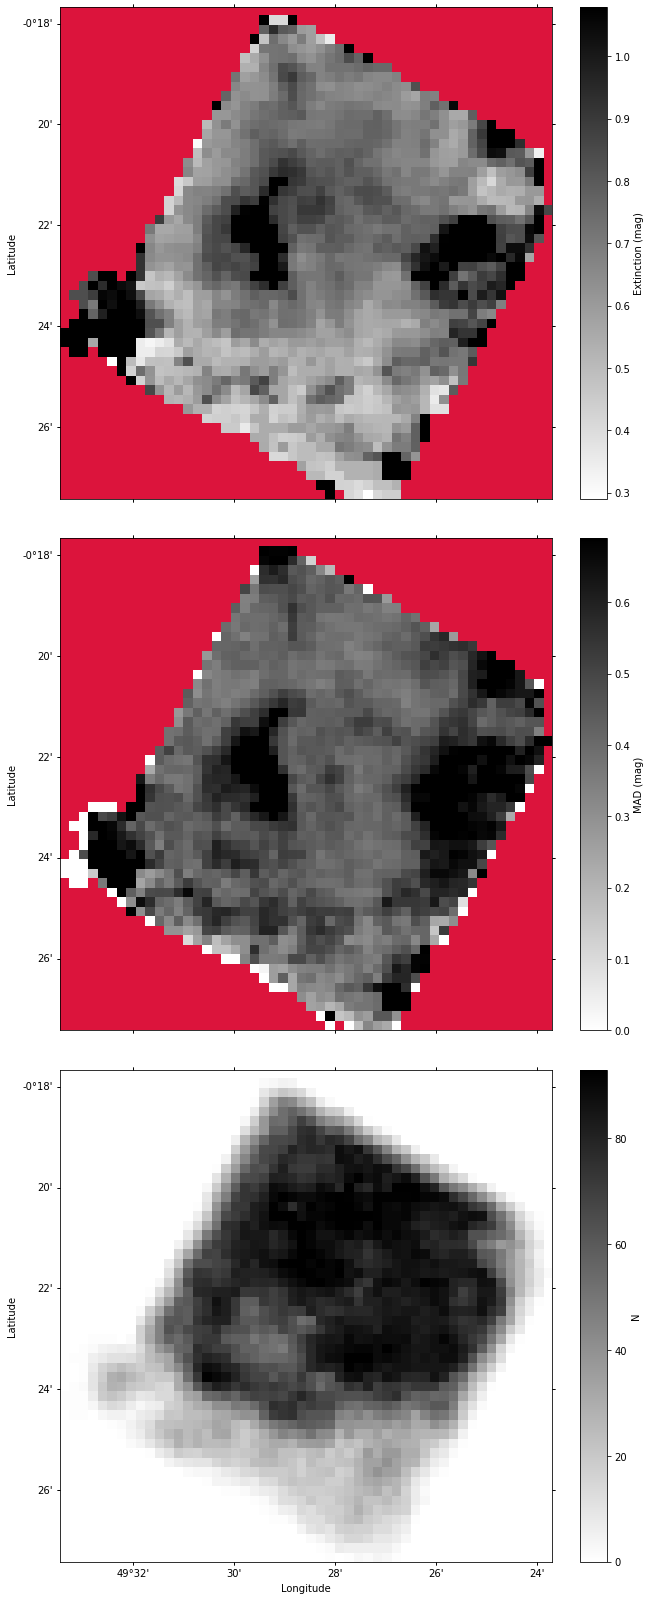

In [321]:
pnicer_emap.plot_map(figsize=10)

# MS Reddening Zone 

In [4]:
ms_rz = Table.read('final_final_gtc_catalog_subsets/final_final_gtc_catalog_revised_no_fgs_bsr_redzone_subset.dat', format = 'ascii')

ms_rz_idx = np.array(ms_rz['col1'])

In [5]:
bil = Table.read('http://stev.oapd.inaf.it/tmp/output72861826819.dat', format = 'ascii')

HTTPError: HTTP Error 404: Not Found

In [6]:
iso_x_points = [-0.019, -0.02, -0.023, -0.026, -0.028, -0.029, -0.031, -0.033, -0.036, -0.04, -0.04, -0.044, -0.046, -0.048, -0.05, -0.053, -0.056, -0.06, -0.066, -0.072, -0.076, -0.078, -0.077, -0.077, -0.077, -0.08, -0.082, -0.08, -0.08, -0.08, -0.081, -0.082, -0.083, -0.084, -0.085, -0.084, -0.084, -0.084, -0.084, -0.084, -0.083, -0.083, -0.083, -0.081, -0.08, -0.079, -0.076, -0.074, -0.072, -0.07, -0.069, -0.068, -0.069, -0.074, -0.074, -0.073, -0.07, -0.073, -0.072, -0.068, -0.065, -0.062, -0.061, -0.06, -0.061, -0.055, -0.054, -0.051, -0.051, -0.047, -0.046, -0.044, -0.042, -0.04, -0.038, -0.035, -0.033, -0.032, -0.028, -0.027, -0.024, -0.022, -0.02, -0.014, 0.001, 0.012, 0.017, 0.03, 0.042, 0.046, 0.047, 0.051, 0.054, 0.058, 0.065, 0.069, 0.073, 0.077, 0.083, 0.091, 0.097, 0.106, 0.113, 0.124, 0.132, 0.165, 0.207, 0.218, 0.224, 0.228, 0.233, 0.237, 0.24, 0.246, 0.251, 0.259, 0.265, 0.272, 0.278, 0.289]#, 0.296]
iso_y_points = [6.51, 6.62, 6.71, 6.81, 6.90, 7.00, 7.10, 7.19, 7.29, 7.38, 7.48, 7.57, 7.67, 7.77, 7.86, 7.96, 8.06, 8.15, 8.24, 8.33, 8.43, 8.52, 8.63, 8.72, 8.82, 8.92, 9.02, 9.11, 9.22, 9.32, 9.42, 9.52, 9.61, 9.71, 9.81, 9.91, 10.01, 10.11, 10.21, 10.31, 10.41, 10.51, 10.61, 10.72, 10.82, 10.92, 11.02, 11.13, 11.23, 11.33, 11.43, 11.54, 11.64, 11.73, 11.83, 11.93, 12.03, 12.13, 12.23, 12.33, 12.44, 12.54, 12.64, 12.75, 12.85, 12.96, 13.06, 13.16, 13.27, 13.37, 13.47, 13.58, 13.68, 13.79, 13.89, 13.99, 14.10, 14.20, 14.30, 14.41, 14.51, 14.62, 14.71, 14.83, 14.95, 15.07, 15.18, 15.30, 15.42, 15.53, 15.64, 15.74, 15.85, 15.95, 16.07, 16.17, 16.27, 16.38, 16.49, 16.61, 16.72, 16.83, 16.94, 17.06, 17.17, 17.33, 17.50, 17.62, 17.73, 17.83, 17.94, 18.06, 18.15, 18.27, 18.37, 18.49, 18.60, 18.71, 18.82, 18.94]#, 19.05]

In [7]:
y_int = np.arange(6.5, 18.5, 0.1)
x_points = np.linspace(-0.5, 3, 1000)
y_points = [1.69 * x_points + i for i in y_int]

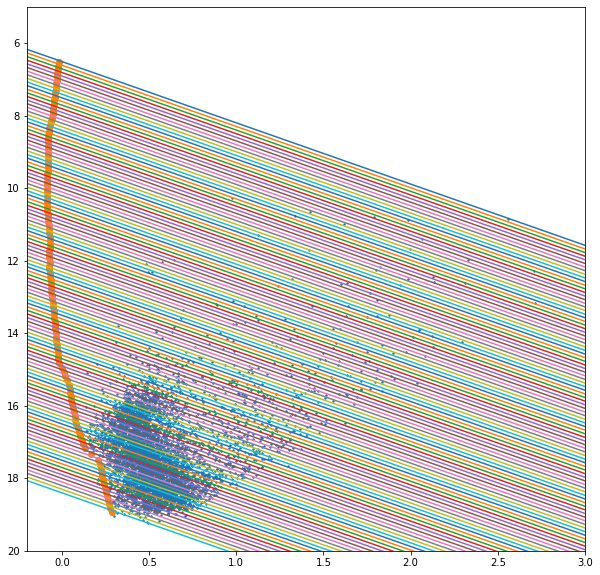

In [8]:
pl.figure(figsize = (10,10))
pl.scatter(gtc_cat[ms_rz_idx]['mag_h_cal'] - gtc_cat[ms_rz_idx]['mag_k_cal'], gtc_cat[ms_rz_idx]['mag_k_cal'], s = 2)
#pl.scatter(bil['col30'] - bil['col31'], bil['col31'] + 13.5)
pl.scatter(iso_x_points, iso_y_points)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.xlim(-0.2, 3); pl.ylim(5, 20)
pl.gca().invert_yaxis()

In [9]:
hmk = np.array(gtc_cat['mag_h_cal'] - gtc_cat['mag_k_cal'])
jmh = np.array(gtc_cat['mag_j_cal'] - gtc_cat['mag_h_cal'])

gtc_cat.add_columns([jmh, hmk], names = ['J-H', 'H-K'])

In [10]:
def slice_checker(x_vals, y_vals, y_int):
    sol = 1.69 * x_vals - y_vals
    
    idx = []
    for i in range(len(sol)):
        if sol[i] < y_int and sol[i] > (y_int - 0.1):
            idx.append(i)
            
    return idx

In [11]:
rz_cat = gtc_cat[ms_rz_idx].copy()

In [12]:
x_vals = np.array(rz_cat['H-K'])
y_vals = np.array(rz_cat['mag_k_cal'])
idx = [slice_checker(x_vals, y_vals, -y_int[i]) for i in range(len(y_int))]

In [13]:
a_v = 5
a_k = a_v * 0.112
a_h = a_k * 1.56
a_j = a_k * 2.51

J = 13
H = 12
K = 11

HK = (H + a_h) - (K + a_k)
JK = (J + a_j) - (K + a_k)
JH = (J + a_j) - (H + a_h)

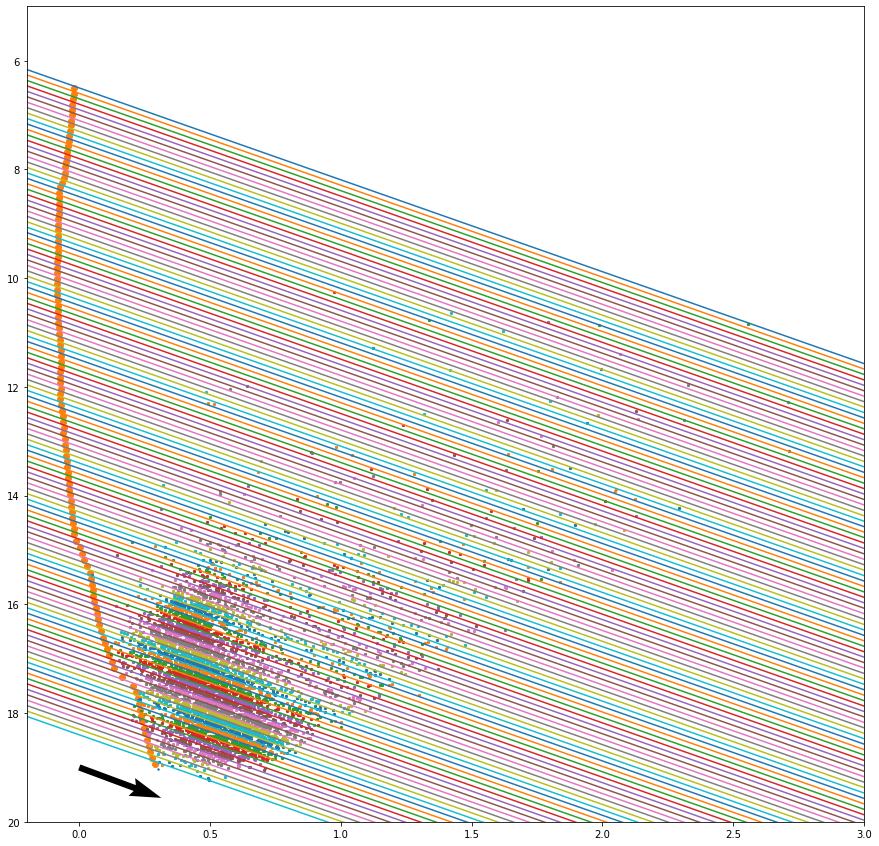

In [14]:
vec = np.array([0.0, 19, HK - 1, a_k])
X, Y, U, V = vec

pl.figure(figsize = (15,15))
pl.scatter(gtc_cat[ms_rz_idx]['mag_h_cal'] - gtc_cat[ms_rz_idx]['mag_k_cal'], gtc_cat[ms_rz_idx]['mag_k_cal'], s = 2)
pl.scatter(iso_x_points, iso_y_points)
for i in range(len(idx)):
    pl.scatter(rz_cat[idx[i]]['mag_h_cal'] - rz_cat[idx[i]]['mag_k_cal'], rz_cat[idx[i]]['mag_k_cal'], s = 5)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale = 1)
pl.xlim(-0.2, 3); pl.ylim(5, 20)
pl.gca().invert_yaxis()

In [15]:
cmd_distance = np.sqrt((0.3135 - 0.0)**2 + (19.5595 - 19)**2)

In [16]:
distance = [np.sqrt((np.array(rz_cat[idx[i]]['H-K']) - iso_x_points[i])**2 + (np.array(rz_cat[idx[i]]['mag_k_cal']) - iso_y_points[i])) for i in range(len(idx))]

<ipython-input-16-86085c2a6157>:1: RuntimeWarning: invalid value encountered in sqrt
  distance = [np.sqrt((np.array(rz_cat[idx[i]]['H-K']) - iso_x_points[i])**2 + (np.array(rz_cat[idx[i]]['mag_k_cal']) - iso_y_points[i])) for i in range(len(idx))]


In [17]:
av_list = (distance / cmd_distance) * 5

<ipython-input-17-ddb8399a8d8e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  av_list = (distance / cmd_distance) * 5


In [18]:
av = np.empty(len(rz_cat))
for i in range(len(idx)):
    av[idx[i]] = av_list[i]

In [19]:
rz_cat.add_column(av, name = 'av')

In [20]:
rz_idx = np.array(rz_cat['index'])

In [21]:
av_all = np.empty(len(gtc_cat))
av_all[:] = np.nan

In [22]:
av_all[rz_idx] = np.array(rz_cat['av'])

# CTTS Reddening Zone

In [23]:
ctts_zone = Table.read('final_final_gtc_catalog_subsets/final_final_gtc_catalog_revised_no_fgs_bsr_ctts_subset.dat', format = 'ascii')

In [24]:
class2 = gtc_cat['Class'] == 2.0
saral_match = gtc_cat['saral_match_separation'] < 0.3
xray = gtc_cat['xray_match_separation'] < 0.4

In [25]:
ctts_idx = np.array(ctts_zone['col1'])
class2_idx = np.array(gtc_cat[class2 & saral_match]['index'])
xray_idx = np.array(gtc_cat[xray]['index'])

In [26]:
new_ctts_idx = np.unique(np.concatenate((ctts_idx, class2_idx, xray_idx)))

In [27]:
ctts_x_points = np.arange(0.03292, 1.0115, 0.0089)
ctts_y_points = [0.566 * i + 0.532 for i in ctts_x_points]

In [28]:
y_int = np.arange(-0.6, 0.51, 0.01)
x_points = np.linspace(-5, 7, 10000)
y_points = [1.69 * x_points + i for i in y_int]

(0.4, 1.5)

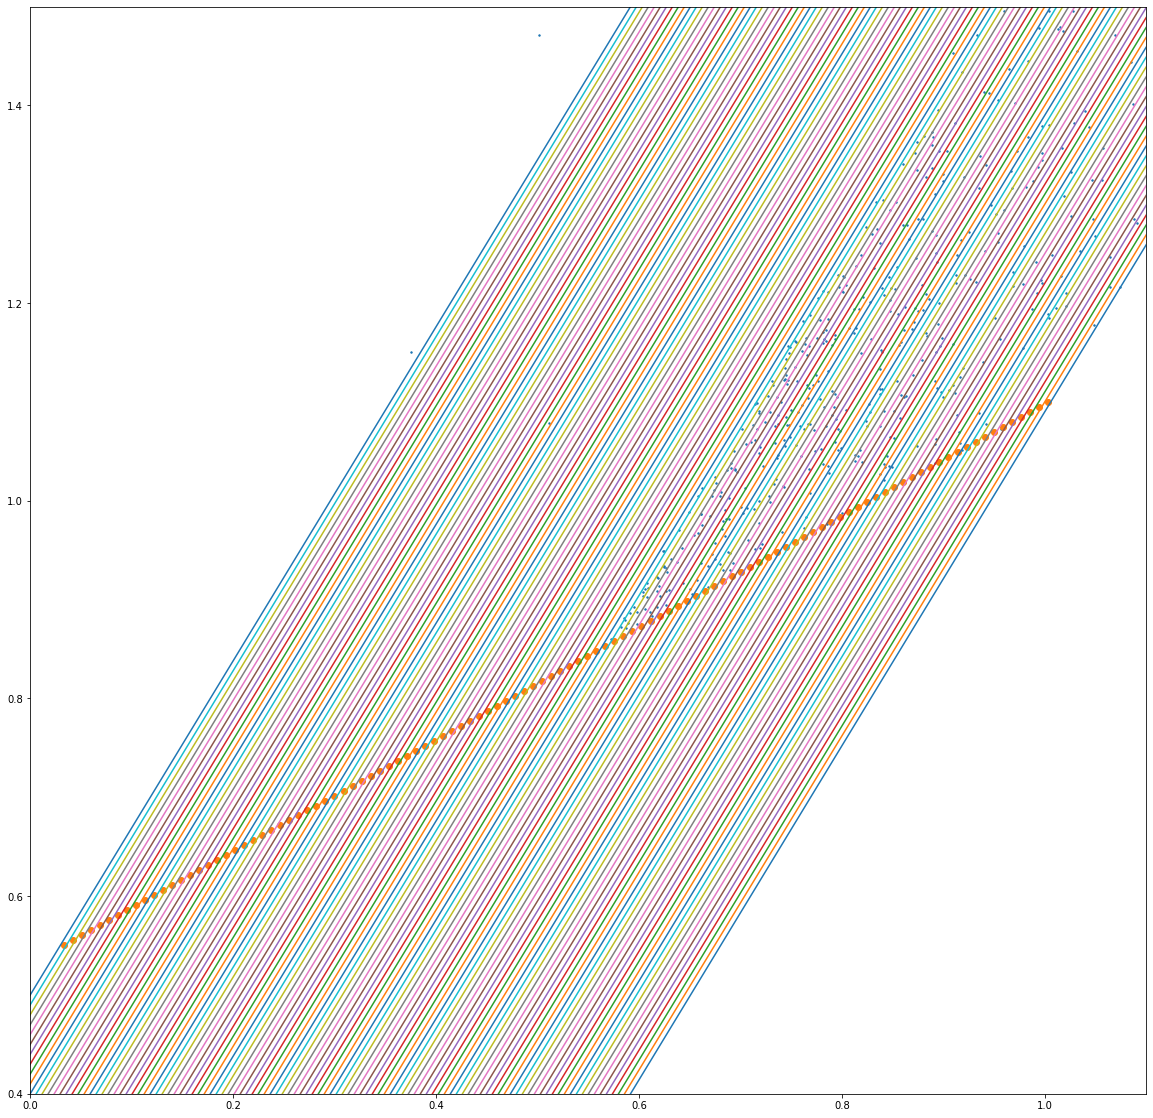

In [30]:
pl.figure(figsize = (20,20))
pl.scatter(gtc_cat[new_ctts_idx]['mag_h_cal'] - gtc_cat[new_ctts_idx]['mag_k_cal'], gtc_cat[new_ctts_idx]['mag_j_cal'] - gtc_cat[new_ctts_idx]['mag_h_cal'], s = 2)
#pl.scatter(bil['col30'] - bil['col31'], bil['col29'] - bil['col30'])
pl.scatter(ctts_x_points, ctts_y_points)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.xlim(0.0, 1.1); pl.ylim(0.4, 1.5)
#pl.gca().invert_yaxis()

In [31]:
def slice_checker(x_vals, y_vals, y_int):
    sol = 1.69 * x_vals - y_vals
    
    idx = []
    for i in range(len(sol)):
        if sol[i] > y_int and sol[i] < (y_int + 0.01):
            idx.append(i)
            
    return idx

In [32]:
ctts_cat = gtc_cat[new_ctts_idx].copy()

In [33]:
x_vals = np.array(ctts_cat['H-K'])
y_vals = np.array(ctts_cat['J-H'])
idx = [slice_checker(x_vals, y_vals, -y_int[i]) for i in range(len(y_int))]
idx.pop(110)

[]

(0.8, 1.5)

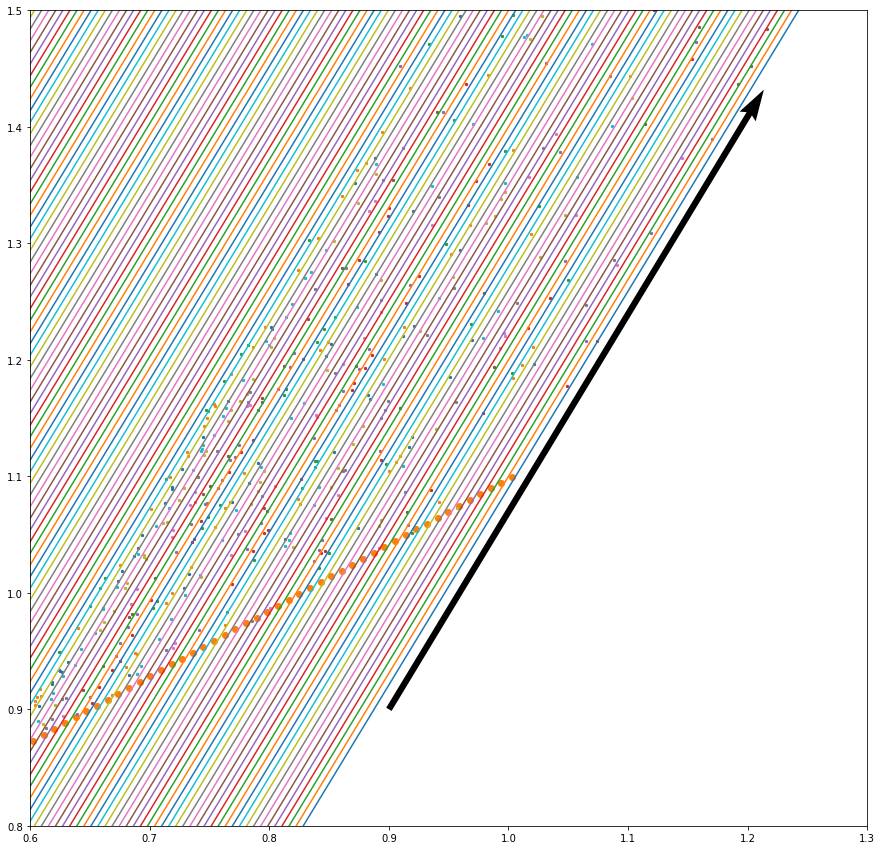

In [35]:
vec = np.array([0.9, 0.9, HK - 1, JH - 1])
X, Y, U, V = vec

pl.figure(figsize = (15,15))
pl.scatter(gtc_cat[new_ctts_idx]['mag_h_cal'] - gtc_cat[new_ctts_idx]['mag_k_cal'], gtc_cat[new_ctts_idx]['mag_j_cal'] - gtc_cat[new_ctts_idx]['mag_h_cal'], s = 2)
#pl.scatter(bil['col30'] - bil['col31'], bil['col29'] - bil['col30'])
pl.scatter(ctts_x_points, ctts_y_points)
for i in range(len(idx)):
    pl.scatter(ctts_cat[idx[i]]['mag_h_cal'] - ctts_cat[idx[i]]['mag_k_cal'], ctts_cat[idx[i]]['mag_j_cal'] - ctts_cat[idx[i]]['mag_h_cal'], s = 5)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale = 1)
pl.xlim(0.6, 1.3); pl.ylim(0.8, 1.5)

In [36]:
ccd_distance = np.sqrt((1.2136 - 0.9)**2 + (1.432 - 0.9)**2)

In [37]:
distance = [np.sqrt((np.array(ctts_cat[idx[i]]['H-K']) - ctts_x_points[i])**2 + (np.array(ctts_cat[idx[i]]['J-H']) - ctts_y_points[i])) for i in range(len(idx))]

In [38]:
av_list = (distance / ccd_distance) * 5

<ipython-input-38-8dc9f4b7d586>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  av_list = (distance / ccd_distance) * 5


In [39]:
av = np.empty(len(ctts_cat))
for i in range(len(idx)):
    av[idx[i]] = av_list[i]

In [40]:
ctts_cat.add_column(av, name = 'av')

In [41]:
ctts_idx = np.array(ctts_cat['index'])

In [42]:
av_all[ctts_idx] = np.array(ctts_cat['av'])

# Herbig Stars

In [43]:
herbig_subset = Table.read('final_final_gtc_catalog_subsets/final_final_gtc_catalog_revised_no_fgs_bsr_herbig_subset.dat', format = 'ascii')

In [45]:
herbig_idx = np.array(herbig_subset['col1'])
herbig_cat = gtc_cat[herbig_idx].copy()

In [46]:
herbig_x_points = [0.029, 0.06, 0.092, 0.124, 0.157, 0.189, 0.221, 0.253, 0.287, 0.319, 0.352, 0.385, 0.417, 0.452, 0.485, 0.519, 0.553, 0.587, 0.621, 0.655, 0.69, 0.726, 0.76, 0.796, 0.832, 0.868, 0.904, 0.941, 0.978, 1.016, 1.054, 1.093, 1.132, 1.172, 1.212, 1.254, 1.295, 1.338, 1.382, 1.427, 1.473, 1.522, 1.571, 1.624, 1.678, 1.735, 1.798, 1.865, 1.942, 2.03, 2.154]
herbig_y_points = [(1.45**(3.1 * x) - 1.8) / 10 for x in herbig_x_points]

In [51]:
y_int = np.arange(0.1, 2.7, 0.05)
x_points = np.linspace(-0.1, 3.5, 1000)
y_points = [1.69 * x_points - i for i in y_int]

(-0.1, 3.8)

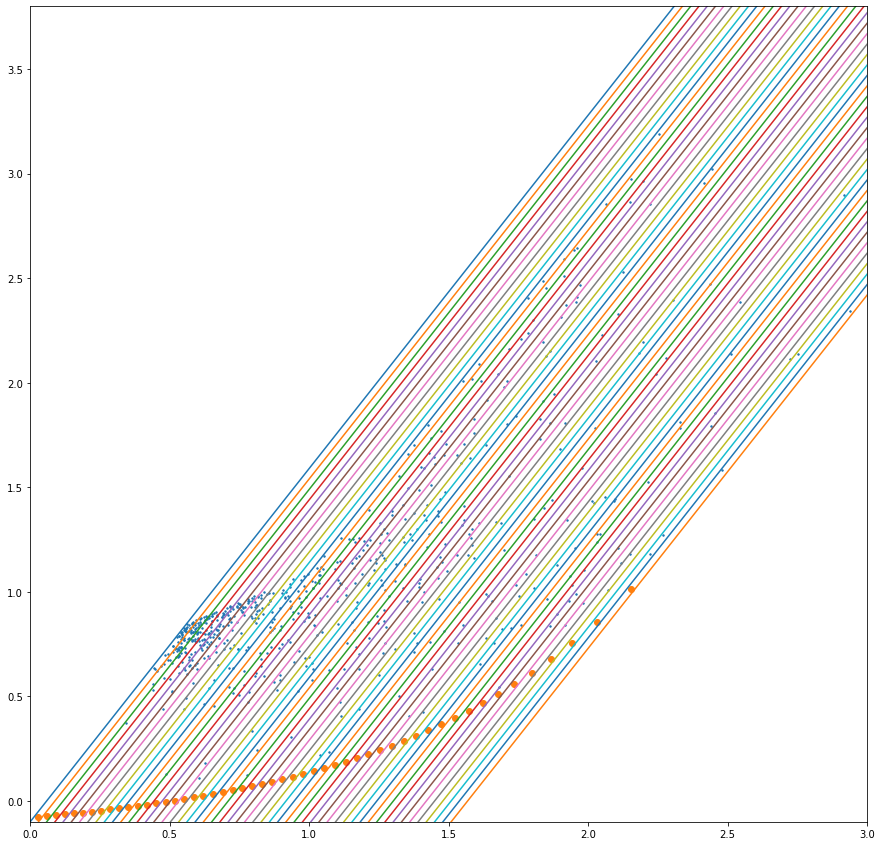

In [53]:
pl.figure(figsize = (15,15))
pl.scatter(gtc_cat[herbig_idx]['mag_h_cal'] - gtc_cat[herbig_idx]['mag_k_cal'], gtc_cat[herbig_idx]['mag_j_cal'] - gtc_cat[herbig_idx]['mag_h_cal'], s = 2)
#pl.scatter(bil['col30'] - bil['col31'], bil['col29'] - bil['col30'])
pl.scatter(herbig_x_points, herbig_y_points)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.xlim(0.0, 3.0); pl.ylim(-0.1, 3.8)

In [56]:
def slice_checker(x_vals, y_vals, y_int):
    sol = 1.69 * x_vals - y_vals
    
    idx = []
    for i in range(len(sol)):
        if sol[i] > (y_int - 0.05) and sol[i] < y_int :
            idx.append(i)
            
    return idx

In [63]:
x_vals = np.array(herbig_cat['H-K'])
y_vals = np.array(herbig_cat['J-H'])
idx = [slice_checker(x_vals, y_vals, y_int[i]) for i in range(len(y_int))]
idx.pop(0)

[]

(-0.1, 3.8)

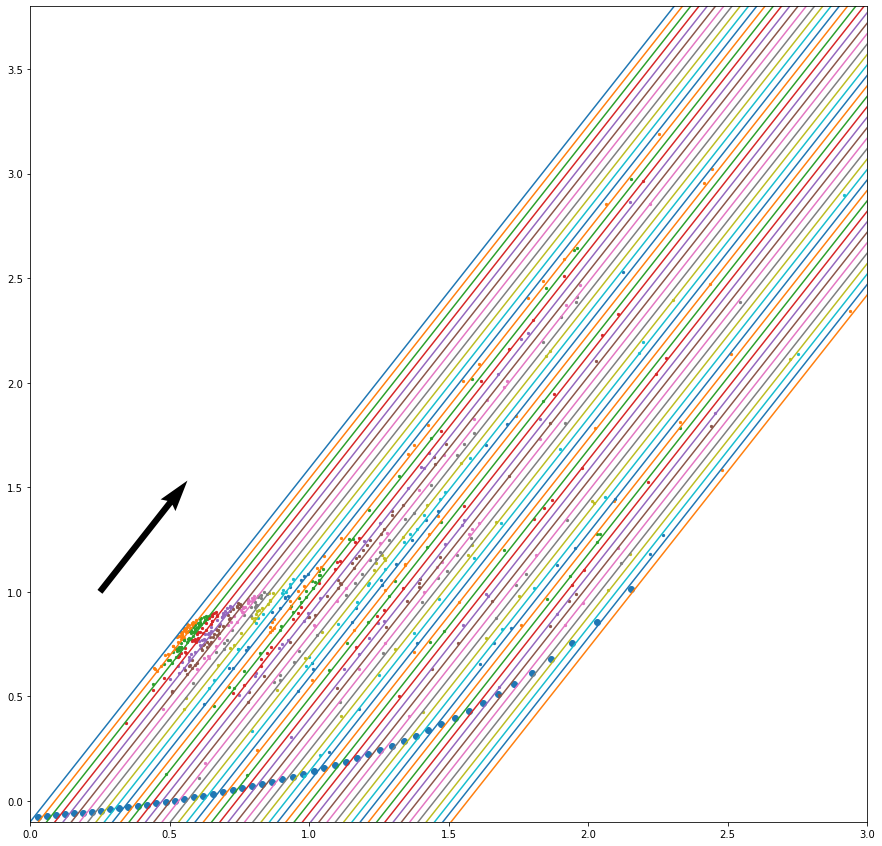

In [68]:
vec = np.array([0.25, 1.0, HK - 1, JH - 1])
X, Y, U, V = vec

pl.figure(figsize = (15,15))
pl.scatter(herbig_x_points, herbig_y_points)
for i in range(len(idx)):
    pl.scatter(herbig_cat[idx[i]]['mag_h_cal'] - herbig_cat[idx[i]]['mag_k_cal'], herbig_cat[idx[i]]['mag_j_cal'] - herbig_cat[idx[i]]['mag_h_cal'], s = 5)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale = 1)
pl.xlim(0.0, 3.0); pl.ylim(-0.1, 3.8)

In [69]:
distance = [np.sqrt((np.array(herbig_cat[idx[i]]['H-K']) - herbig_x_points[i])**2 + (np.array(herbig_cat[idx[i]]['J-H']) - herbig_y_points[i])) for i in range(len(idx))]

<ipython-input-69-7ac276f497a8>:1: RuntimeWarning: invalid value encountered in sqrt
  distance = [np.sqrt((np.array(herbig_cat[idx[i]]['H-K']) - herbig_x_points[i])**2 + (np.array(herbig_cat[idx[i]]['J-H']) - herbig_y_points[i])) for i in range(len(idx))]


In [70]:
av_list = (distance / ccd_distance) * 5

<ipython-input-70-8dc9f4b7d586>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  av_list = (distance / ccd_distance) * 5


In [71]:
av = np.empty(len(herbig_cat))
for i in range(len(idx)):
    av[idx[i]] = av_list[i]

In [72]:
herbig_cat.add_column(av, name = 'av')

In [73]:
herbig_idx = np.array(herbig_cat['index'])

In [74]:
av_all[herbig_idx] = np.array(herbig_cat['av'])

# Cluster Stars

In [168]:
np.where(gtc_cat['H-K'] > 6)

(array([5272, 9798]),)

In [170]:
mag_h = np.array(gtc_cat['mag_h_cal'])
mag_h[5272] = 16.88

In [172]:
mag_k = np.array(gtc_cat['mag_k_cal'])
h_minus_k = mag_h - mag_k

In [175]:
gtc_cat['mag_h_cal'] = mag_h
gtc_cat['H-K'] = h_minus_k

In [82]:
vertices2 = PixCoord(x=[850, 750, 870, 1000, 1030, 950], y=[1440, 1300, 1150, 1200, 1300, 1400])
region_pix2 = PolygonPixelRegion(vertices = vertices2)

vertices1 = PixCoord(x=[1030, 1100, 1200, 1200, 1100, 1000], y=[1300, 1300, 1300, 1460, 1490, 1450])
region_pix1 = PolygonPixelRegion(vertices = vertices1)

star_coords = PixCoord(gtc_cat['x_0'], gtc_cat['y_0'])

north = np.where(region_pix1.contains(star_coords) == True)[0]
main = np.where(region_pix2.contains(star_coords) == True)[0]

cluster_idx = np.concatenate((north, main))

In [192]:
cluster_cat = gtc_cat[cluster_idx].copy()

In [189]:
cluster_x_points = [-0.073, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.075, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -0.084, 0, 0, 0, 0, 0, 0, 0, 0, -0.042, -0.048, -0.051, -0.057, -0.066, -0.063, -0.063, -0.063, -0.075, -0.069, -0.078, -0.072, -0.08, -0.078, -0.08, -0.08, -0.08, -0.09, -0.09, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.08, -0.09, -0.09, -0.09, -0.09, -0.09, -0.09, -0.1, -0.1, -0.09, -0.1, -0.09, -0.1, -0.09, -0.1, -0.1, -0.1, -0.11, -0.11, -0.11, -0.1, -0.09, -0.09, -0.07, -0.07, -0.08, -0.09, -0.09, -0.08, -0.07, -0.07, -0.05, -0.03, -0.02, -0.02, -0.01, 0.00, 0.01, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.06, 0.06, 0.06, 0.06, 0.07, 0.06, 0.07, 0.07, 0.08, 0.08, 0.08, 0.088, 0.093, 0.095, 0.1, 0.105, 0.108, 0.119, 0.138, 0.15, 0.162, 0.172, 0.182, 0.189, 0.198, 0.205, 0.213, 0.220, 0.225, 0.230, 0.237, 0.241, 0.251, 0.256, 0.266, 0.272, 0.278, 0.289, 0.291, 0.299, 0.306, 0.316, 0.321, 0.328, 0.338]
cluster_y_points = [1.325, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.62, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5.31, 0, 0, 0, 0, 0, 0, 0, 0, 6.28, 6.37, 6.46, 6.56, 6.65, 6.75, 6.85, 6.94, 7.02, 7.14, 7.22, 7.33, 7.41, 7.52, 7.61, 7.71, 7.82, 7.91, 8.01, 8.11, 8.21, 8.30, 8.40, 8.52, 8.62, 8.72, 8.82, 8.92, 9.01, 9.12, 9.20, 9.30, 9.39, 9.50, 9.60, 9.69, 9.79, 9.89, 10.01, 10.1, 10.19, 10.3, 10.4, 10.5, 10.58, 10.67, 10.79, 10.88, 10.97, 11.08, 11.21, 11.31, 11.42, 11.53, 11.61, 11.7, 11.8, 11.92, 12.01, 12.13, 12.27, 12.39, 12.51, 12.62, 12.74, 12.84, 12.97, 13.07, 13.18, 13.29, 13.42, 13.54, 13.64, 13.74, 13.86, 13.96, 14.07, 14.16, 14.26, 14.38, 14.47, 14.59, 14.68, 14.79, 14.9, 15.01, 15.11, 15.22, 15.32, 15.44, 15.55, 15.68, 15.81, 15.93, 16.04, 16.16, 16.27, 16.39, 16.50, 16.61, 16.72, 16.83, 16.94, 17.05, 17.16, 17.27, 17.38, 17.50, 17.61, 17.72, 17.84, 17.94, 18.06, 18.17, 18.29, 18.40, 18.51, 18.62]

In [159]:
y_int = np.arange(1.4, 18.1, 0.1)
x_points = np.linspace(-1.0, 6, 1000)
y_points = [1.69 * x_points + i for i in y_int]

In [118]:
bil = Table.read('http://stev.oapd.inaf.it/tmp/output457924665956.dat', format = 'ascii')

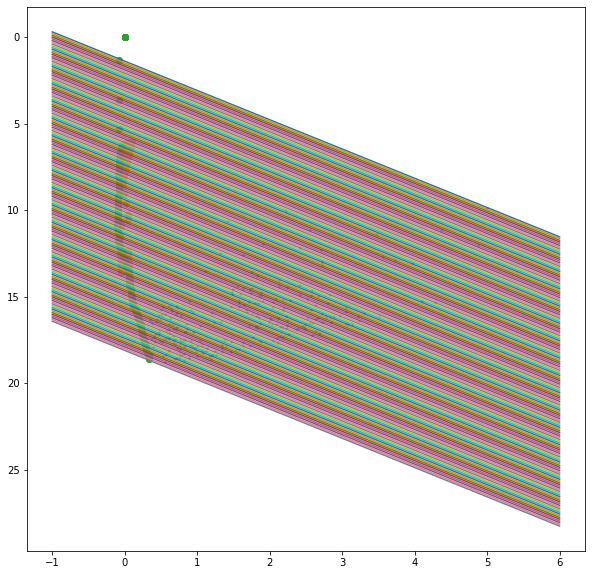

In [194]:
pl.figure(figsize = (10,10))
pl.scatter(cluster_cat['mag_h_cal'] - cluster_cat['mag_k_cal'], cluster_cat['mag_k_cal'], s = 2)
pl.scatter(bil['col30'] - bil['col31'], bil['col31'] + 13.5)
pl.scatter(cluster_x_points, cluster_y_points)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
#pl.xlim(-0.2, 0.4); pl.ylim(5, 10)
pl.gca().invert_yaxis()

In [191]:
def slice_checker(x_vals, y_vals, y_int):
    sol = 1.69 * x_vals - y_vals
    
    idx = []
    for i in range(len(sol)):
        if sol[i] < y_int and sol[i] > (y_int - 0.1):
            idx.append(i)
            
    return idx

In [203]:
x_vals = np.array(cluster_cat['H-K'])
y_vals = np.array(cluster_cat['mag_k_cal'])
idx = [slice_checker(x_vals, y_vals, -y_int[i]) for i in range(len(y_int))]
idx.pop(167)

[]

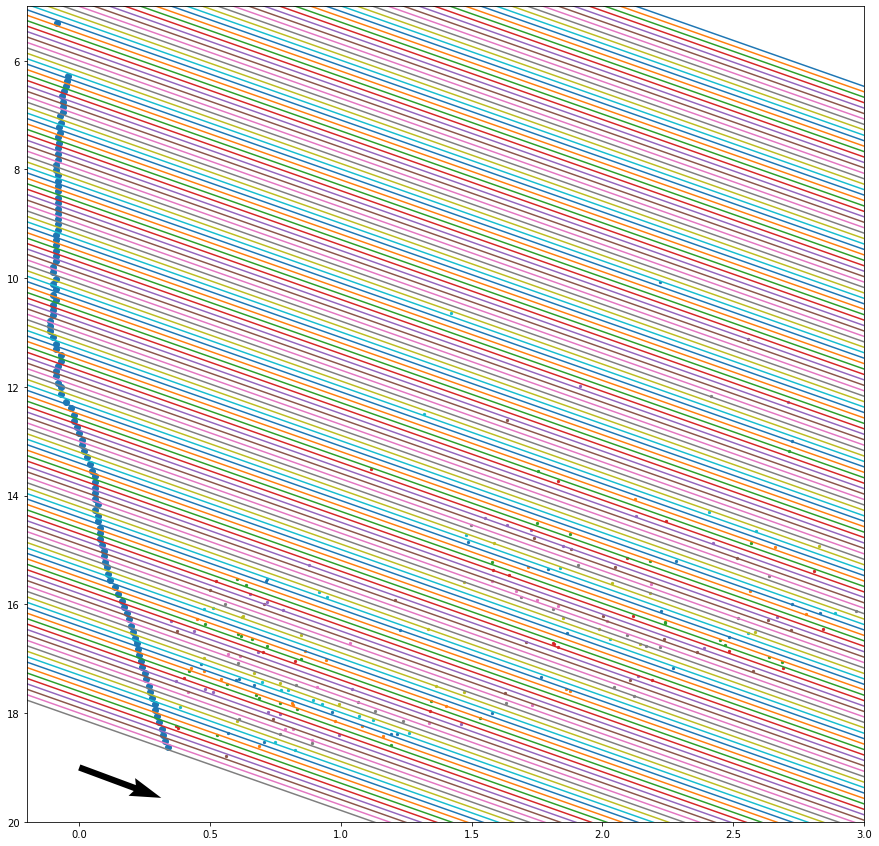

In [204]:
vec = np.array([0.0, 19, HK - 1, a_k])
X, Y, U, V = vec

pl.figure(figsize = (15,15))
#pl.scatter(gtc_cat[ms_rz_idx]['mag_h_cal'] - gtc_cat[ms_rz_idx]['mag_k_cal'], gtc_cat[ms_rz_idx]['mag_k_cal'], s = 2)
pl.scatter(cluster_x_points, cluster_y_points)
for i in range(len(idx)):
    pl.scatter(cluster_cat[idx[i]]['mag_h_cal'] - cluster_cat[idx[i]]['mag_k_cal'], cluster_cat[idx[i]]['mag_k_cal'], s = 5)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale = 1)
pl.xlim(-0.2, 3); pl.ylim(5, 20)
pl.gca().invert_yaxis()

In [205]:
distance = [np.sqrt((np.array(cluster_cat[idx[i]]['H-K']) - cluster_x_points[i])**2 + (np.array(cluster_cat[idx[i]]['mag_k_cal']) - cluster_y_points[i])) for i in range(len(idx))]

In [206]:
av_list = (distance / cmd_distance) * 5

<ipython-input-206-ddb8399a8d8e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  av_list = (distance / cmd_distance) * 5


In [207]:
av = np.empty(len(cluster_cat))
for i in range(len(idx)):
    av[idx[i]] = av_list[i]

In [208]:
cluster_cat.add_column(av, name = 'av')

In [209]:
cluster_idx = np.array(cluster_cat['index'])

In [210]:
av_all[cluster_idx] = np.array(cluster_cat['av'])

In [340]:
av_all[np.where(av_all > 100)[0]] = np.nan

In [341]:
av_all[np.where(av_all < 0)[0]] = np.nan

In [343]:
gtc_cat.add_column(av_all, name = 'av')

# Remove Low Extinction Sources

In [355]:
low_ext = gtc_cat['av'] < 10
low_ext_idx = np.array(gtc_cat[low_ext]['index'])

In [358]:
pms_stars = np.unique(np.concatenate((herbig_idx, new_ctts_idx)))

In [363]:
remove = [i for i in low_ext_idx if i not in pms_stars]

In [348]:
df = gtc_cat.to_pandas()

arr = np.empty(shape = (50,50), dtype = float)
test_arr = np.zeros(shape = 50, dtype = float)

for ii in range(50):
    
    range_y = df['y_0'].between(ii * 46, (ii+1) * 46)
    
    for i in range(50):
    
        range_x = df['x_0'].between(i * 46, (i+1) * 46)
        
        test_arr[i] = np.nanmean(df[range_x & range_y]['av'])
        
    arr[ii] = test_arr

<ipython-input-348-fa0eb3d85935>:14: RuntimeWarning: Mean of empty slice
  test_arr[i] = np.nanmean(df[range_x & range_y]['av'])


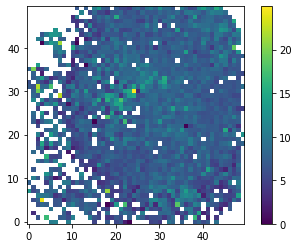

In [349]:
pl.imshow(arr, origin = 'lower')
pl.colorbar()